In [1]:
%matplotlib inline
%run util_draw.py
from rootpy.io import root_open
# import sys
# from matplotlib import rc
# rc('text', usetex=True)
from ExpData import ExpData
from ExpData import SimData
import ExpData as ed
import math

class InputParms:
    def __init__(self, name):
        self.name = name
        self.dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
        self.e16_sim_fn = None
        self.e16_h6r_fn = None
        self.e16_h6r_dir = 'h6recon'
        self.e16_exp_fn = None
        self.e16_h6e_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
        self.e1f_sim_fn = None
        self.e1f_h6r_fn = None
        self.e1f_h6r_dir = 'h6recon'
        self.e1f_exp_fn = None
        self.e1f_h6e_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'

parms_t0 = InputParms('tight0')
parms_t0.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t0.e16_h6r_fn = parms_t0.e16_sim_fn
parms_t0.e16_exp_fn = 'e16_exp_h6_t0_nopcor.root' #'e16_exp_h6_top1.root'
parms_t0.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t0.e1f_h6r_fn = parms_t0.e1f_sim_fn
parms_t0.e1f_exp_fn = 'e1f_exp_h6_top1.root'

parms_t1 = InputParms('tight1')
parms_t1.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t1.e16_h6r_fn = 'e16_sim_skim_top1_175_275_t1.root'
parms_t1.e16_h6r_dir = 'tight3_h6recon'
parms_t1.e16_exp_fn = 'e16_exp_h6_t1_nopcor.root'
parms_t1.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t1.e1f_h6r_fn = 'e1f_sim_skim_top1_175_275_t1.root'
parms_t1.e1f_h6r_dir = 'tight3_h6recon'
parms_t1.e1f_exp_fn = 'e1f_exp_h6_t1.root'

parms_t2 = InputParms('tight2')
parms_t2.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t2.e16_h6r_fn = 'e16_sim_skim_top1_175_275_t2.root'
parms_t2.e16_h6r_dir = 'tight3_h6recon'
parms_t2.e16_exp_fn = 'e16_exp_h6_t2_nopcor.root'
parms_t2.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t2.e1f_h6r_fn = 'e1f_sim_skim_top1_175_275_t2.root'
parms_t2.e1f_h6r_dir = 'tight3_h6recon'
parms_t2.e1f_exp_fn = 'e1f_exp_h6_t2.root'

parms_t3 = InputParms('tight3')
parms_t3.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t3.e16_h6r_fn = parms_t0.e16_sim_fn
parms_t3.e16_h6r_dir = 'tight3_h6recon'
parms_t3.e16_exp_fn = 'e16_exp_h6_t3_nopcor.root'
parms_t3.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t3.e1f_h6r_fn = parms_t0.e1f_sim_fn
parms_t3.e1f_h6r_dir = 'tight3_h6recon'
parms_t3.e1f_exp_fn = 'e1f_exp_h6_t3.root'

In [2]:
E1F_E0 = 5.497
E16_E0 = 5.754
E1F_LUM = 19.844e6
E16_LUM = 28.1e6

PI = 3.14159265358979312
FSC = 0.00729735253
A = FSC
NA = 6.02214129E23
QE = 1.60217646E-19
MP = 0.93827203
MOMEGA = 0.78265
WOMEGA = 0.00849
BR = 0.891

def mdraw2d(hists, rows=2, cols=3, xlabel='', ylabel='',
            xlims=None, ylims=None, vmin=None, vmax=None,
            space=0, grid=False, figsize=None, **kwargs):
    nr, nc = rows, cols
    if figsize is None:
        figsize=goldenaspect(6.5,nr,nc)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=2*space, left=0.1, right=0.95, bottom=0.175)
    im = None
    gmin = min([h.GetMaximum() for h in hists]) if vmin is None else vmin
    gmax = max([h.GetMaximum() for h in hists]) if vmax is None else vmax
    mult = 1.0 if gmin<=0.9*gmax else 0.9
    vmax = mult*gmax if vmax is None else vmax
    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = nc*irow+(icol+1)
            h = hists[hnum-1]
            ax = plt.subplot(gs[irow, icol])
            im = rplt.imshow(asrootpy(h), axes=ax, vmin=vmin, vmax=vmax, **kwargs)
#             rplt.hist2d(h, axes=ax, **kwargs) #, norm=LogNorm())
            if xlims is not None:
                plt.xlim(xlims)
            if ylims is not None:
                plt.ylim(ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            if grid is True:
                plt.grid()
    fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    return fig

def nu(w, q2):
    return (w*w-MP*MP+q2)/(2*MP)


def epsilon(w, q2, e0):
    n = nu(w, q2)
    e1 = e0-n
    epsInv = 1+2*(q2+n*n)/(4*e0*e1-q2)
    return 1.0/epsInv


def vgflux(w, q2, e0):
    eps = epsilon(w, q2, e0)
    return A*w*(w*w-MP*MP)/(4*PI*e0*e0*MP*MP*q2*(1-eps))


def xbjork(w, q2):
    return q2/(2*MP*nu(w, q2))


def get_kfac(W):
    m, M = MOMEGA, MP
    return 1/((1/(2*W)*math.sqrt(m**4-2*m**2*M**2-2*m**2*W**2+M**4-2*M**2*W**2+W**4))/((W**2-M**2)/(2*W)))

def interp_nn(h, ibin0):
    iL,iR = 0,0
    vL,vR = 0,0
    eL,eR = 0,0
    for ibin in range(ibin0+1,h.GetNbinsX()+1):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iR = ibin
            vR = v
            eR = e
            break
    for ibin in reversed(range(1,ibin0)):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iL = ibin
            vL = v
            eL = e
            break
    vL = vR if iL==0 else vL
    vR = vL if iR==0 else vR
    e = (eL**2+eR**2)**0.5
    if vL == vR:
        return (vL, e)
    else:
        #y = y1+m(x-x1)
        m = (vR-vL)/(iR-iL)
        return (vL+m*(ibin0-iL), e)

def w8d_Q2_mean(Q2_0, Q2_1):
    n = math.log(Q2_1)-math.log(Q2_0)
    d = 1/Q2_0-1/Q2_1
    return n/d

In [3]:
def calc_diff_xsects(W, Q2, exparms, suppress_chatter=False,
                     h2rad=None, effabs=1):
    struct_funcs = []
    binned, sim, e0, lum, sim_err_0, sim_lo_acc = exparms
    h2_exp_set = binned.get_h2s(W, Q2)
    h2_sim_set = sim.get_acc2d(W, Q2, sim_err_0, sim_lo_acc)
    h2e = h2_exp_set[0].Clone('%s_diffs'%h2_exp_set[0].GetName())
    
    if h2rad is not None:
        _, _, _W, _ = ed.get_adjusted_edges(h2rad.GetXaxis(), W)
        _, _, _Q2, _ = ed.get_adjusted_edges(h2rad.GetYaxis(), Q2)
        bW, bQ2 = h2rad.GetXaxis().FindBin(_W), h2rad.GetYaxis().FindBin(_Q2)
        w8 = h2rad.GetBinContent(bW, bQ2)
        h2e.Scale(w8)
    h2e.Scale(1/effabs)
    
    h2e_b4acc = h2_exp_set[0]
    
    h2a = h2_sim_set[0][4]

    h2e.Divide(h2a)

    result = h2_exp_set[1]

    hacc,herr = ed.get_vhists(h2_sim_set[0][2])
    hacc_m, herr_m = ed.get_vhists(h2_sim_set[0][4])
    hacc.SetBinContent(1,0)
    herr.SetBinContent(1,0)
    hacc_m.SetBinContent(1,0)
    herr_m.SetBinContent(1,0)

    if not suppress_chatter:
        fig = mdraw([hacc,herr], 2,1)
#         for h,ax in zip([hacc_m, herr_m], fig.get_axes()):
#             X, Y = list(h.x()), list(h.y())
#             ax.plot(X, Y, 'go')
        for ax in fig.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        fig2 = mdraw([hacc_m, herr_m], 2,1)
        for ax in fig2.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        # draw(hacc)
        # plt.ylim(0)
        # plt.xlim(0,0.2)
        # draw(herr)
        # plt.ylim(0)
        # plt.xlim(0,0.2)

    if not suppress_chatter:
        draw(result[2])
        fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
        X, Y = zip(*fitted_points)
        Y_bg = [ed.bgfun([x], result[3]) for x in X]
        plt.plot(X, Y)
        plt.plot(X, Y_bg)
        plt.vlines(0.825,0,3500)
        plt.grid()
        plt.show()

    hs = [h2e_b4acc,h2a,h2e]

    if not suppress_chatter:
        fig = mdraw(hs,3,1)
        for h,ax in zip(hs,fig.axes):
            im = rplt.imshow(asrootpy(h), axes=ax)
            plt.colorbar(im, ax=ax) #clim=(h.GetMinimum(),h.GetMaximum()), ax=ax)
            plt.tight_layout()

    W, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(0), W)
    Q2, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(1), Q2)
    avgQ2 = w8d_Q2_mean(Q2[0],Q2[1])
    avgW = sum(W)/2 if isinstance(W, list) else W
    dW = 0.02 if not isinstance(W, list) else W[1]-W[0]
    dQ2 = 0.05 if not isinstance(Q2, list) else Q2[1]-Q2[0]
    dPHI, dCOST = 2*PI/18, 0.2
    xb = xbjork(avgW, avgQ2)
    eps = epsilon(avgW, avgQ2, e0)
    eps_l = (avgQ2/(nu(avgW,avgQ2)**2))*eps
    flux = vgflux(avgW, avgQ2, e0)
    normval = BR*lum*flux*dW*dQ2*dCOST*dPHI
    if not suppress_chatter:
        print('h2e_b4acc int: %.1f (normed: %.1f)'%(h2e_b4acc.Integral('width'), h2e_b4acc.Integral('width')/normval))
        print('h2e_afacc int: %.1f (normed: %.1f)'%(h2e.Integral('width'), h2e.Integral('width')/normval))
        print('-----')
    
    h2e.Scale(1/normval)
    
    m = MOMEGA
    M = MP
#     kin_factor = 1/(2*avgW)*math.sqrt(m**4-2*m**2*M**2-2*m**2*avgW**2+M**4-2*M**2*avgW**2+avgW**4)
#     kin_factor /= (avgW**2-M**2)/(2*avgW)
    kin_factor = 1/get_kfac(avgW) #p/k
    def dcoss(x, p):
        A_TOT = 1
        A_TT = eps*math.cos(2*x[0])
        A_LT = math.sqrt(2*eps_l*(1+eps))*math.cos(x[0])
        return kin_factor*(A_TOT*p[0]+A_TT*p[1]+A_LT*p[2])

    fcoss = R.TF1('fcoss', dcoss, -PI, PI, 3)
    fpol0 = R.TF1('fpol0', lambda x,p: p[0], -PI, PI, 1)
    fcoss.SetParLimits(0,0,3000)
    hphis, holes, pcoss, ppol0s = [], [], [], []
    
    for ibin in range(1,h2e.GetNbinsY()+1):
        hphi = asrootpy(h2e.ProjectionX('%s_%d'%(h2e.GetName(),ibin),ibin,ibin))
#         hphi.Scale(1/normval) #replaced by h2e.Scale above
        these_holes = hphi.Clone('%s_holes'%h2e.GetName())
        these_holes.Reset()
        for ix in range(1,hphi.GetNbinsX()+1):
            if hphi.GetBinError(ix) == 0:
                nnval, nnerr = interp_nn(hphi, ix)
                these_holes.SetBinContent(ix, nnval)
                these_holes.SetBinError(ix, nnerr)
#                 hphi.SetBinContent(ix, nnval)
#                 hphi.SetBinError(ix, nnerr)
        hphi.Fit(fpol0, 'N0F', 'goff')
        fcoss_p0 = fpol0.GetParameter(0)/kin_factor
        fcoss_e0 = fpol0.GetParError(0)/kin_factor
        ppol0s.append((fpol0.GetParameter(0), fpol0.GetParError(0)))
        #let parameter 0 go lower when there are holes in the data
        fcoss.SetParLimits(0, fcoss_p0-(3+0.5*len(these_holes))*fcoss_e0, fcoss_p0+3*fcoss_e0)
        hphi.Fit(fcoss, 'N0', 'goff')
        fcoss_parms = [(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)]
        if not suppress_chatter:
            print('\n'.join([str(parm) for parm in fcoss_parms]))
            print('-')
        cost = h2e.GetYaxis().GetBinCenter(ibin)
        pcoss.append([avgW, avgQ2, cost, fcoss_parms])
        holes.append(these_holes)
        hphis.append(hphi)
        
    if not suppress_chatter:
        fig = mdraw(hphis, 2,5)
        for i,ax in enumerate(fig.axes):
            Xlin = np.linspace(-PI, PI)
            for iparm, (parm,err) in enumerate(pcoss[i][3]):
                fcoss.SetParameter(iparm, parm)
            Ycoss = [fcoss.Eval(x) for x in Xlin]
            ax.plot(Xlin, Ycoss, 'g')
            XY = [(x, y) for (x, y) in zip(list(holes[i].x()), list(holes[i].y())) if y!=0]
            Yerr = [yerr[0] for (x, yerr) in zip(list(holes[i].x()), list(holes[i].yerr())) if yerr[0]!=0]
            if len(XY)>0:
                X, Y = zip(*XY)
                ax.errorbar(X, Y, Yerr, fmt='ro', zorder=20)
            ax.hlines(ppol0s[i][0], -PI, PI, 'r')
            (ppol0, ppol0e) = ppol0s[i]
            ppol0_lo = ppol0-(3+0.5*len(XY))*ppol0e
            ppol0_hi = ppol0+3*ppol0e
            ax.hlines(ppol0_lo, -PI, PI, 'r', linestyles='dashed')
            ax.hlines(ppol0_hi, -PI, PI, 'r', linestyles='dashed')
            ax.grid()
    #         ax.vlines(X, -1000, 3000, 'r', linestyles='dashed')
    plt.show()

    int_2d = 0
    int_2d_b = 0
    for hphi,these_holes in zip(hphis, holes):
        int_2d += hphi.Integral('width')*dCOST
        int_2d_b += hphi.Integral('width')*dCOST
        int_2d_b += these_holes.Integral('width')*dCOST
    
    int_2d_0 = 0
    int_2d_1 = 0
    for pcos in pcoss:
        for iparm, (parm,err) in enumerate(pcos[3]):
            fcoss.SetParameter(iparm, parm)
        int_2d_0 += sum([fcoss.Eval(x) for x in hphi.x()])*dCOST*dPHI
        int_2d_1 += pcos[3][0][0]*dCOST*2*math.pi*kin_factor
    
    if not suppress_chatter:
        print('bjorken=%.3f'%xb)
        print('Q2=%.3f'%avgQ2)
        print('W=%.3f'%avgW)
        print('epsilon=%.3f'%eps)
        print('xsect_f=%.1f (alt: %.1f)'%(int_2d_0, int_2d_1))
        print('xsect_d=%.1f (alt: %.1f)'%(int_2d, int_2d_b))
    return (xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss, h2e)

In [4]:
def xsects(W0, W1, Q2ranges, parms=parms_t0):
    e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                         h6dir=parms.e1f_h6e_dir)
    e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                         h6dir=parms.e16_h6e_dir)
    
    e16_sim = SimData()
    e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                    h6rdir=parms.e16_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))

    e1f_sim = SimData()
    e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                    h6rdir=parms.e1f_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
        
    e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
    e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

    Ws = np.arange(W0, W1, 0.02)

    e1f_xsects, e16_xsects = [], []
    for Q2 in Q2ranges:
        e1f_xsects.append([calc_diff_xsects(w, Q2, e1f_exparms, True) for w in Ws])
        e16_xsects.append([calc_diff_xsects(w, Q2, e16_exparms, True) for w in Ws])

    for e1f_xsect, e16_xsect in zip(e1f_xsects, e16_xsects):
        e1f_avgQ2 = e1f_xsect[0][1]
        e16_avgQ2 = e16_xsect[0][1]
        
        XY = [(xsect[2], xsect[5]) for xsect in e1f_xsect]
        X,Y = zip(*XY)
        ymax0 = max(Y)
        plt.plot(X, Y, 'o', label='e1f, %.3f'%e1f_avgQ2)
        
        XY = [(xsect[2], xsect[5]) for xsect in e16_xsect]
        X,Y = zip(*XY)
        ymax1 = max(Y)
        plt.plot(X, Y, 'o', label='e16, %.3f'%e16_avgQ2)
        
        plt.ylim(0, 1.1*max([ymax0,ymax1]))
        plt.grid()
        plt.legend()
        plt.show()
        
        # e1?_xsects contains a list for each Q2 range;
        # each Q2 range list contains
        #    xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
        # where W and Q2 are ranges and pcoss is a list of
        #    avgW, avgQ2, cost, fcoss_parms
        # and fcoss_parms is a list of tuples where each tuple
        # is (parm_value, parm_error).
    return (e16_xsects, e1f_xsects)

In [5]:
def xsects(W0, W1, Q2ranges, parms=parms_t0):
    e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                         h6dir=parms.e1f_h6e_dir)
    e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                         h6dir=parms.e16_h6e_dir)
    
    e16_sim = SimData()
    e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                    h6rdir=parms.e16_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))

    e1f_sim = SimData()
    e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                    h6rdir=parms.e1f_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
        
    e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
    e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

    Ws = np.arange(W0, W1, 0.02)

    e1f_xsects, e16_xsects = [], []
    for Q2 in Q2ranges:
        e1f_xsects.extend([calc_diff_xsects(w, Q2, e1f_exparms, True, parms.h2rad, parms.e1f_abseff) for w in Ws])
        e16_xsects.extend([calc_diff_xsects(w, Q2, e16_exparms, True, parms.h2rad, parms.e16_abseff) for w in Ws])
        
        # e1?_xsects contains a list of
        #    xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
        # where W and Q2 are ranges and pcoss is a list of
        #    avgW, avgQ2, cost, fcoss_parms
        # and fcoss_parms is a list of tuples where each tuple
        # is (parm_value, parm_error).
    return (e16_xsects, e1f_xsects)

In [41]:
def get_exp_parms(q2str, name=None, wmax=2.6, q2ranges=None, fn_h2rad='../e1f6/test/hQ2W_rad_corr.root'): #fn_h2rad=None):
    if name is None:
        name = q2str
    parms = InputParms(name)
    parms.e16_sim_fn = 'e16_sim_skim_top1_%s_ho.root'%q2str
    parms.e16_h6r_fn = 'e16_sim_skim_top1_%s_ho_b.root'%q2str.replace('.','').replace('-','_') #parms.e16_sim_fn
    parms.e16_h6r_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
    parms.e16_exp_fn =  'e16_skim_small_h6_t0_nphe.root' # 'e16_skim_small_eloose_h6_t0.root'
    parms.e1f_sim_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str
    parms.e1f_h6r_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str.replace('.','').replace('-','_') #parms.e1f_sim_fn
    parms.e1f_h6r_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
    parms.e1f_exp_fn =  'e1f_skim_small_h6_t0_nphe.root' # 'e1f_skim_small_eloose_h6_t0.root'
    parms.h2rad = None
    if fn_h2rad is not None:
        with root_open(fn_h2rad) as fin:
            h2rad = fin['hQ2W_corr']
            h2rad.SetDirectory(0)
            parms.h2rad = asrootpy(h2rad)
    if q2ranges is None:
        (q2_0, q2_1) = [float(q2) for q2 in q2str.split('-')]
        parms.q2ranges = [[q2_0+0.16, q2_0+0.45],
                          [q2_0+0.46, q2_1-0.25]]
    else:
        parms.q2ranges = q2ranges
    parms.wmax = wmax
    parms.acc_lo = 0.015
    parms.err_hi = 0.15
    parms.e1f_abseff = 0.8*0.9 #0.8 from recook comparison; 0.8 track recon eff
    parms.e16_abseff = 0.8 #0.8 track recon eff
    return parms

parms_exp_q2strs = ['1.75-2.75', '2.25-3.25', '2.75-3.75',
                    '3.25-4.25', '3.75-4.75', '4.25-5.25']
parms_exp_wmaxs = [2.6, 2.55, 2.3, 2.2, 2.1, 2]
# parms_exp_wmaxs = [2.6]*6
parms_exps = [get_exp_parms(q2str) for q2str in parms_exp_q2strs]
for (wmax, parms) in zip(parms_exp_wmaxs, parms_exps):
    parms.wmax = wmax
parms_exps[3].q2ranges=[[3.35,4.15]]
parms_exps[4].q2ranges=[[3.85,4.65]]
parms_exps[5].q2ranges=[[4.35,5.15]]

In [42]:
# (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, 2.3, [[2.85, 3.15], [3.15, 3.65]], parms_exps[2])

In [43]:
parms = parms_exps[0]
e1f_sim = SimData()
e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                h6rdir=parms.e1f_h6r_dir,
                h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                     h6dir=parms.e1f_h6e_dir)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


In [44]:
e16_sim = SimData()
e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                h6rdir=parms.e16_h6r_dir,
                h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))
e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                     h6dir=parms.e16_h6e_dir)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


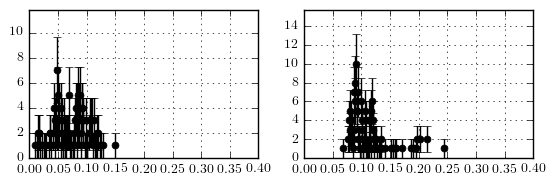

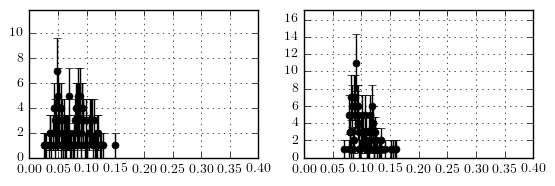

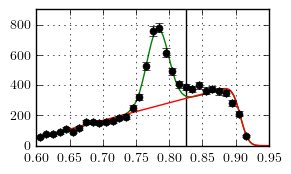

h2e_b4acc int: 147.9 (normed: 78.5)
h2e_afacc int: 3021.3 (normed: 1603.2)
-----
(362.82410442411486, 30.179610377813503)
(-11.680146792150222, 52.1304947840914)
(-103.80331665175481, 43.701305479010685)
-
(301.5236151728198, 30.887182988137397)
(89.95100067435304, 56.112117193172814)
(-171.17714695994098, 43.29441840999834)
-
(286.6430478222826, 33.3585068234905)
(143.7448123703125, 56.597161022768994)
(-138.6027900685116, 46.47432729074088)
-
(155.63625648606882, 35.23114530585619)
(139.34745819550565, 58.48017614330028)
(-70.06170760159728, 45.92333400145459)
-
(54.021179525366506, 33.348154555289824)
(113.28695475217498, 53.50373552770028)
(-117.07198654510658, 44.53486557164094)
-
(203.79193178181993, 46.97475224966868)
(111.48752507812345, 74.48793378013741)
(161.33500739508554, 72.4814806513158)
-
(273.8273030894085, 48.53662973633823)
(311.01117178504023, 79.90754266185024)
(79.3948294452667, 76.60461046290806)
-
(374.1880475406108, 51.953997045320534)
(119.30319610723491, 86.9

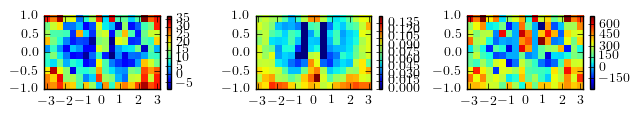

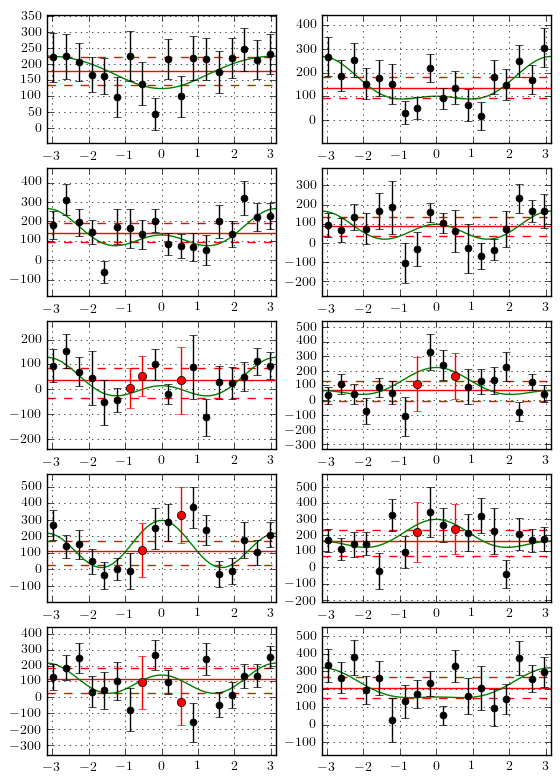

bjorken=0.446
Q2=2.043
W=1.850
epsilon=0.802
xsect_f=1638.9 (alt: 1638.9)
xsect_d=1603.2 (alt: 1696.5)
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


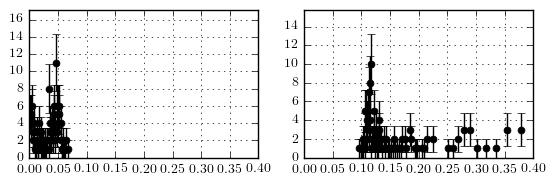

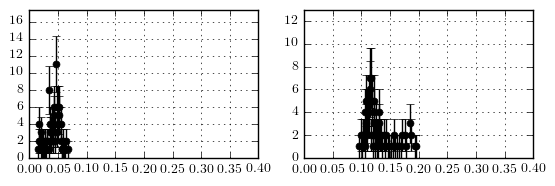

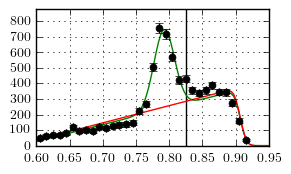

h2e_b4acc int: 135.0 (normed: 49.8)
h2e_afacc int: 5096.7 (normed: 1882.5)
-----
(540.9535699891105, 45.55449482709889)
(76.13147726983223, 75.47651154530143)
(-199.10080478944218, 67.5492951930831)
-
(489.36894706449357, 44.91254019001536)
(51.61064681614981, 76.67538452907557)
(-26.796472733783943, 61.38876669334355)
-
(297.4445290483638, 53.24292561157483)
(108.35496025075443, 89.59960144943106)
(-209.74313733508885, 58.101844833436274)
-
(260.205572864686, 77.56744430998225)
(19.77716890441397, 131.85379491896083)
(-218.71677036015276, 74.98862631851017)
-
(102.05359975054444, 72.48897348458974)
(114.40111338427018, 117.67596998045893)
(-167.4948902548102, 77.18288771837263)
-
(24.776520848545488, 87.11403820587714)
(189.0136640497521, 125.60143145901972)
(-78.1723250616856, 87.46908886536995)
-
(194.0373590937952, 91.80987231579786)
(314.76443293160827, 126.06748116956409)
(65.83153286971408, 107.46278928246593)
-
(320.9882025879317, 86.16054315375789)
(323.17339757385446, 141.088

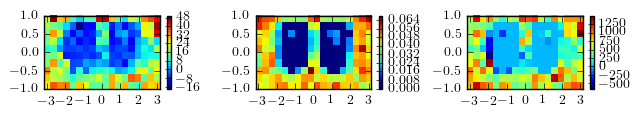

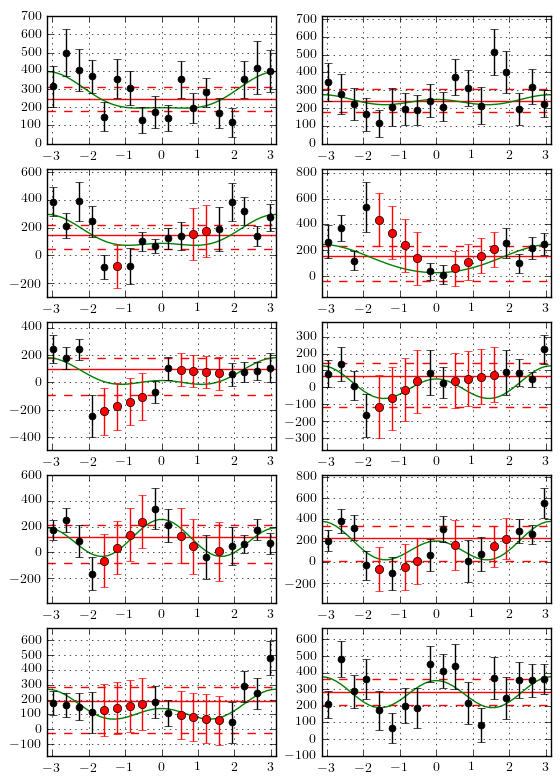

bjorken=0.446
Q2=2.043
W=1.850
epsilon=0.822
xsect_f=1903.6 (alt: 1903.6)
xsect_d=1882.5 (alt: 2129.3)


In [45]:
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.025)
diffx_res_e1f = calc_diff_xsects(1.85, [1.91, 2.20], e1f_exparms, False, parms.h2rad, parms.e1f_abseff)
# diffx_res_e1f = calc_diff_xsects(1.9, [2.21,2.70], e1f_exparms, False, parms.h2rad, parms.e1f_abseff)

# parms = parms_exps[5]
# e16_sim = SimData()
# e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
#                 h6rdir=parms.e16_h6r_dir,
#                 h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))
# e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
#                      h6dir=parms.e16_h6e_dir)

e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.15, 0.015)
diffx_res_e16 = calc_diff_xsects(1.85, [1.91, 2.20], e16_exparms, False, parms.h2rad, parms.e16_abseff)

In [46]:
from scipy import optimize as so
import pandas as pd
%matplotlib inline

def legR2(x, c0, c1, c2):
    return np.polynomial.legendre.Legendre([c0,c1,c2])(x)

def get_xsect_dict(xsects):
    #xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
    dicts = []
    for (xb, eps, xtot_f, xtot_d, wq2_data, h2e) in [(xsects_1wq2bin[0], xsects_1wq2bin[3], xsects_1wq2bin[4], xsects_1wq2bin[5], xsects_1wq2bin[7], xsects_1wq2bin[-1]) for xsects_1wq2bin in xsects]:
        xtot_d_err = R.Double(0.0)
        xtot_d_alt = h2e.IntegralAndError(0,-1,0,-1,xtot_d_err, 'width')
        for cost_data in wq2_data:
            W, Q2, cost, parms = cost_data
            W, Q2, cost = [round(x,3) for x in (W,Q2,cost)]
            (x_tot, x_tot_err), (x_tl, x_tl_err), (x_tt, x_tt_err) = parms
            _nu = nu(W, Q2)
            eps_l = Q2/_nu**2*eps
            names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'cost', 'int_f', 'int_d', 'int_d_err', 'x_tot', 'x_tot_err',
                     'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']
            vals = [_nu, xb, eps, eps_l, W, Q2, cost, xtot_f, xtot_d, xtot_d_err, x_tot, x_tot_err,
                     x_tt, x_tt_err, x_tl, x_tl_err]
            dicts.append({n:v for (n,v) in zip(names,vals)})
    return dicts

def get_legs_dict(df, W, Q2, fitfunc=legR2):
    df_wq2 = df[(df.W==W)&(df.Q2==Q2)]
    parm_vals, parm_errs = (0,0,0), (0,0,0)
    vals, names = [], []
    if len(df_wq2.replace(0,np.NaN).dropna()) >= 3:
        parm_vals, pcov = so.curve_fit(fitfunc, df_wq2.cost,
                                       df_wq2.x_tot,
                                       sigma=df_wq2.x_tot_err.replace(0,np.NaN),
                                       absolute_sigma=True)
        parm_errs = np.sqrt(np.diag(pcov))
        vals = [df_wq2.nu.iloc[0], df_wq2.xb.iloc[0], df_wq2.eps.iloc[0], df_wq2.eps_l.iloc[0], W, Q2]
        for v, e in zip(parm_vals, parm_errs):
            vals.extend([v,e])
        names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'D0_tot', 'D0_tot_err',
                 'D1_tot', 'D1_tot_err', 'D2_tot', 'D2_tot_err']
    return ({n:v for (n,v) in zip(names,vals)})

def plots_1wq2bin(df, W, Q2, ax=None, fitfunc=legR2):
    df_wq2 = df[(df.W==W)&(df.Q2==Q2)]
    fig, ax = plt.subplots() if ax is None else _, ax
    df_wq2.plot('cost', 'x_tot', kind='scatter', yerr='x_tot_err', ax=ax, grid=True)
    parm_vals, pcov = so.curve_fit(fitfunc, df_wq2.cost,
                                   df_wq2.x_tot,
                                   sigma=df_wq2.x_tot_err.replace(0,np.NaN),
                                   absolute_sigma=True)
    parm_errs = np.sqrt(np.diag(pcov))
#     w8s = df_wq2.x_tot_err.apply(lambda x: 1/(x**2) if x>0 else 0)
#     leg_parms = np.polynomial.legendre.legfit(df_wq2.cost.values,
#                                               df_wq2.x_tot.values,
#                                               w=w8s.values,
#                                               deg=2, full=True)
#     fleg = np.polynomial.legendre.Legendre(leg_parms[0])
    Xlin = np.linspace(-1,1)
#     Y = [fleg(x) for x in Xlin]
    Y = [legR2(x, *parm_vals) for x in Xlin]
    ax.plot(Xlin,Y)
#     return (leg_parms)
    
    return (parm_vals, parm_errs)

In [47]:
parms = parms_exps[0]
(e16_xsects_t0, e1f_xsects_t0) = xsects(1.73, parms.wmax, parms.q2ranges, parms)
(e16_dicts, e1f_dicts) = (get_xsect_dict(e16_xsects_t0), get_xsect_dict(e1f_xsects_t0))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [48]:
# (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, 1.9, [[3.85, 4.65]], parms_exps[4])

# e16_dicts.extend(get_xsect_dict(e16_xsects_t0))
# e1f_dicts.extend(get_xsect_dict(e1f_xsects_t0))

In [49]:
for parms in parms_exps[1:]:
    (e16_xsects_t0, e1f_xsects_t0) = xsects(1.73, parms.wmax, parms.q2ranges, parms)
    e16_dicts.extend(get_xsect_dict(e16_xsects_t0))
    e1f_dicts.extend(get_xsect_dict(e1f_xsects_t0))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_2.25-3.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_2.25-3.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_2.75-3.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_2.75-3.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_3.25-4.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_3.25-4.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_3.75-4.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_3.75-4.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_4.25-5.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_4.25-5.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [50]:
# df_e1f = pd.DataFrame(get_xsect_dict(e1f_xsects_t0))
# df_e16 = pd.DataFrame(get_xsect_dict(e16_xsects_t0))
# df_e1f_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2) for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
# df_e16_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2) for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

df_e1f = pd.DataFrame(e1f_dicts)
df_e16 = pd.DataFrame(e16_dicts)

In [51]:
df_e1f_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2) for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
df_e16_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2) for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

[ 308.51337422  -68.80940283  250.71429601]
[ 12.95657826  22.18711812  28.24834867]
[ 318.77917965  -31.61611568  346.586666  ]
[ 21.79269095  30.69385135  43.83485099]
*********
[ 252.01933778   -8.97659365  202.77601165]
[ 11.57010553  20.38524264  25.53445188]
[ 205.85660978  -55.13890022  246.33764807]
[ 13.53876948  21.32635123  28.72831317]


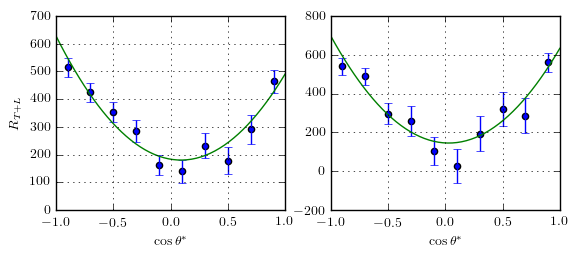

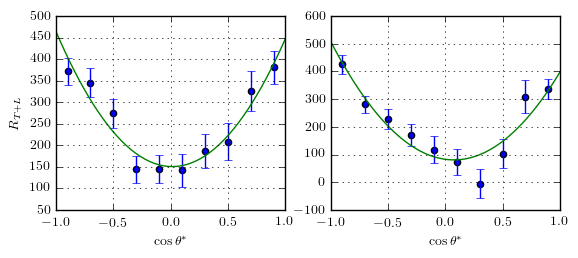

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.83, 2.043, ax1)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.85, 2.043, ax2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
ax1.set_xlabel(r'$\cos{\theta^*}$')
ax2.set_xlabel(r'$\cos{\theta^*}$')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.83, 2.344, ax1)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.85, 2.344, ax2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
ax1.set_xlabel(r'$\cos{\theta^*}$')
ax2.set_xlabel(r'$\cos{\theta^*}$')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

[ 79.84017581  87.40983559  49.06718459]
[  6.03726329  10.94215299  12.3732103 ]
[ 90.68426042  59.80795311   0.1100263 ]
[  8.05034445  14.48200819  15.71849374]
*********
[ 72.94321947  76.63497497  43.34428167]
[  5.45718247   9.96777099  11.11198305]
[ 87.81425853  57.16259936  54.6268551 ]
[  6.86194113  12.89229438  14.21034514]


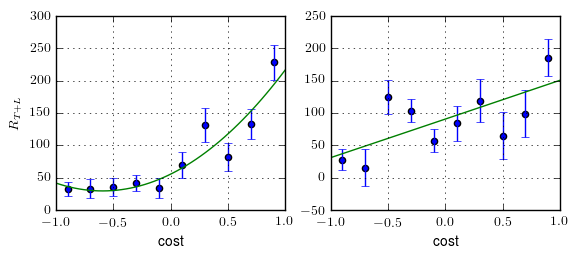

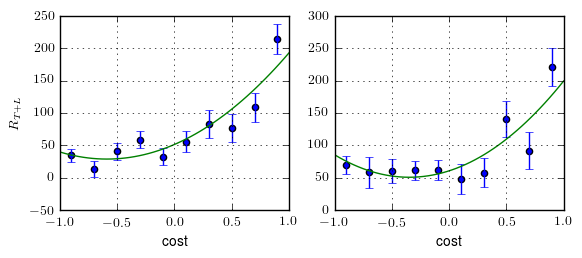

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.05, 2.043, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.05, 2.043, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)


print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.05, 2.344, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.05, 2.344, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

[ 13.09329745  12.87899042  26.96009038]
[ 1.81286533  3.34426032  4.41157296]
[ 18.61726356  14.6709657   46.29790997]
[ 2.32380962  3.82543597  5.87286303]
*********
[ 10.38300257  15.25226518  27.83536024]
[ 3.3256723   5.64486732  7.45077743]
[ 13.96178162  17.32830692  35.92219158]
[ 1.6548825   2.81097064  4.21112373]


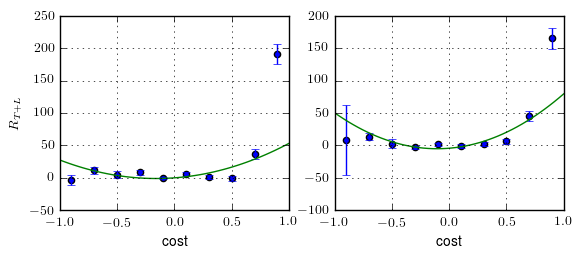

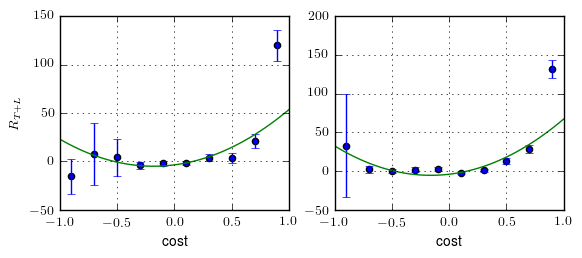

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.49, 2.043, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.49, 2.043, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)


print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.49, 2.344, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.49, 2.344, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

In [55]:
# t =e1f_xsects_t0[3]
# h = t[-1]
# draw(h)
# e = R.Double(0.0)
# print(h.IntegralAndError(0,-1,0,-1,e,"width"))
# print(e)
# print(t)

In [56]:
df_e1f.head()

,Q2,W,cost,eps,eps_l,int_d,int_d_err,int_f,nu,x_tl,x_tl_err,x_tot,x_tot_err,x_tt,x_tt_err,xb
0,2.043,1.73,-0.9,0.834682,0.347737,916.001783,58.888036,797.888537,2.214467,-85.803464,122.224582,500.071639,89.881066,-31.840556,152.740715,0.491592
1,2.043,1.73,-0.7,0.834682,0.347737,916.001783,58.888036,797.888537,2.214467,9.485726,121.493391,545.039527,93.575203,-120.632879,167.935538,0.491592
2,2.043,1.73,-0.5,0.834682,0.347737,916.001783,58.888036,797.888537,2.214467,-87.163562,114.371236,531.814941,94.023953,-265.519542,153.030640,0.491592
3,2.043,1.73,-0.3,0.834682,0.347737,916.001783,58.888036,797.888537,2.214467,4.060274,118.005810,428.157538,87.340330,300.617630,148.228548,0.491592
4,2.043,1.73,-0.1,0.834682,0.347737,916.001783,58.888036,797.888537,2.214467,51.786337,100.543958,280.367539,81.679054,-43.014189,132.209384,0.491592


In [57]:
df_e1f['int_f_err'] = df_e1f['int_d_err']
df_e16['int_f_err'] = df_e16['int_d_err']
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()
def correct_bg_sub(rec):
    return rec.D0_tot #if rec.W<2 else rec.D0_tot*(1.42857*rec.W-1.85714)
df_f['D0_tot'] = df_f.apply(correct_bg_sub, axis=1)
df_6['D0_tot'] = df_6.apply(correct_bg_sub, axis=1)
# df_f['kfac'] = df_f.W.apply(lambda x: get_kfac(x))
# df_6['kfac'] = df_6.W.apply(lambda x: get_kfac(x))
df_m = pd.read_table('/home/ephelps/dropbox/Notebooks/omega/Projects/Omega/Cross-sections/Morand/xsect_integrated_morand.txt')
m = MOMEGA
M = MP
def scale_x_by_kinfactor(rec):
    return rec.xsect*get_kfac(rec.W)
def scale_xerr_by_kinfactor(rec):
    return rec.error*get_kfac(rec.W)
df_m['Rtot'] = df_m.apply(scale_x_by_kinfactor, axis=1)/(4*math.pi)
df_m['Rtot_err'] = df_m.apply(scale_xerr_by_kinfactor, axis=1)/(4*math.pi)
# df_m['kfac'] = df_m.W.apply(lambda x: get_kfac(x))
df_f = df_f.merge(df_e1f[['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates(), how='inner', on=['W', 'Q2'])
df_6 = df_6.merge(df_e16[['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates(), how='inner', on=['W', 'Q2'])

In [58]:
# df_e1f.groupby(['Q2','W','int_d','int_f'])['x_tot'].agg(lambda x: sum(0.2*x))

# df_e1f.head()
get_kfac(1.721)

74.13295705696142

In [59]:
df_m[(df_m.Q2>1.9)&(df_m.Q2<2.2)]

,xb,Q2,W,epsilon,t_0,xsect,error,Rtot,Rtot_err
2,0.252,2.042,2.63,0.43,-0.14,421,75,38.732487,6.900087
5,0.310,2.050,2.33,0.63,-0.23,551,98,54.615490,9.713826
9,0.370,2.050,2.09,0.74,-0.37,1002,180,112.509596,20.211305
14,0.429,2.055,1.90,0.81,-0.59,2203,348,313.825552,49.573896


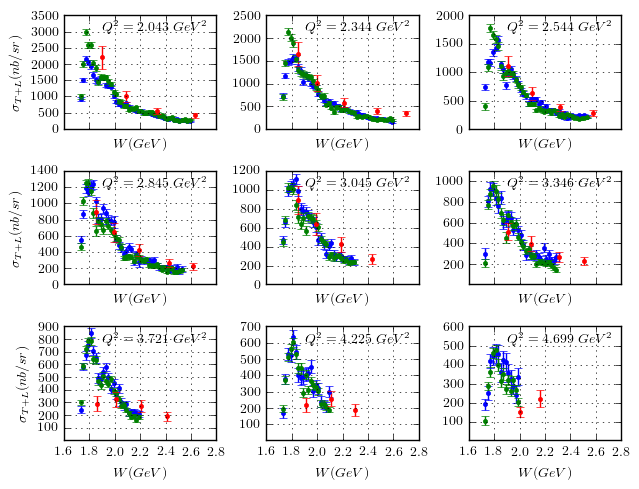

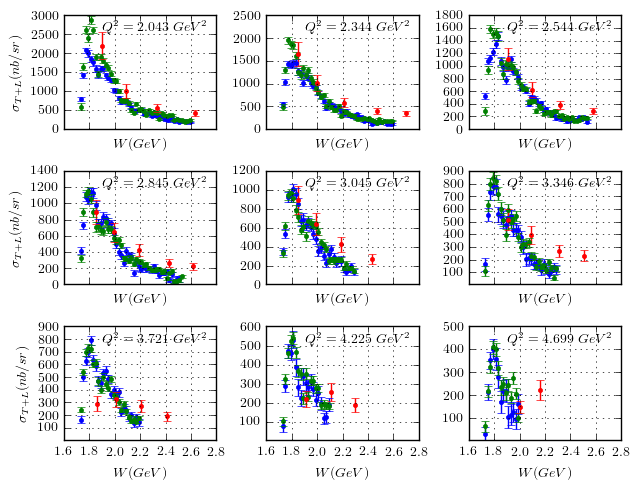

In [60]:
e1fscale=1
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
for iax,(ax,Q2) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()))):
    leg_i = 'int_d'
    lbl = r'$\sigma_{T+L} (nb/sr)$'
    df_1q2_6 = df_e16[df_e16.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2 = df_e1f[df_e1f.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xsect', 'error']]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
    ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
    ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xsect.values, df_1q2_m.error.values, fmt='r.')
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
    ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.set_xlabel(r'$W (GeV)$')
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
    plt.tight_layout()

fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
for iax,(ax,Q2) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()))):
    leg_i = 'int_f'
    lbl = r'$\sigma_{T+L} (nb/sr)$'
    df_1q2_6 = df_e16[df_e16.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2 = df_e1f[df_e1f.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xsect', 'error']]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
    ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
    ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xsect.values, df_1q2_m.error.values, fmt='r.')
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
    ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.set_xlabel(r'$W (GeV)$')
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
    plt.tight_layout()

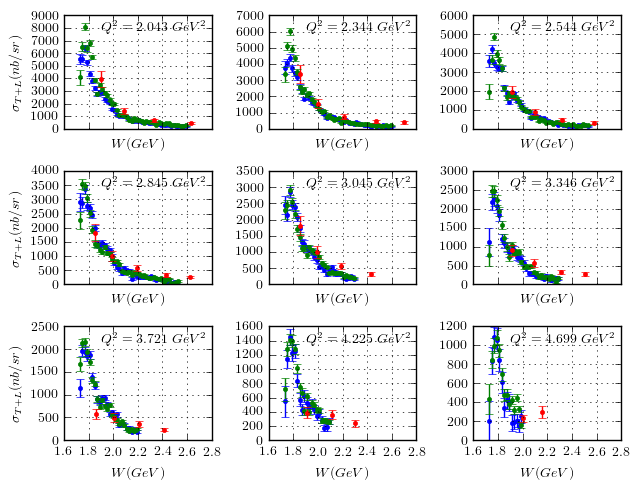

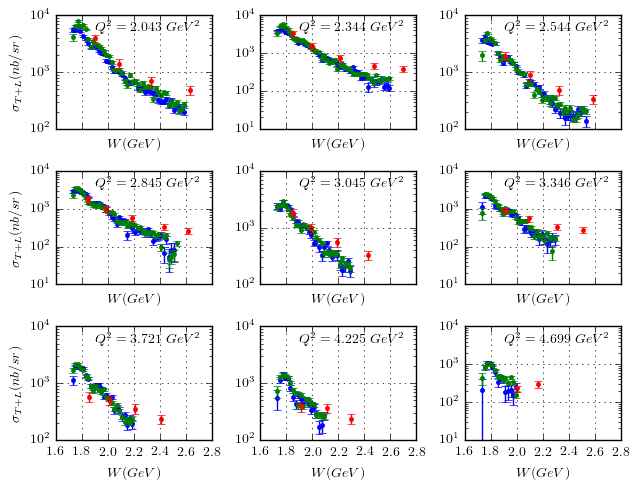

In [64]:
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
for iax,(ax,Q2) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()))):
    leg_i = 'int_f'
    lbl = r'$\sigma_{T+L} (nb/sr)$'
    df_1q2 = df_f[df_f.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']]
    df_1q2_6 = df_6[df_6.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'Rtot', 'Rtot_err']]
    def kfac(rec):
        return get_kfac(rec.W)
#     ax.plot(df_1q2.W, df_1q2[leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i]*(df_1q2_6.apply(kfac, axis=1)), 'g.')
    ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale).values, (df_1q2['%s_err'%leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale).values, fmt='b.')
    ax.errorbar(df_1q2_6.W.values, (df_1q2_6[leg_i]*df_1q2_6.apply(kfac, axis=1)).values, (df_1q2_6['%s_err'%leg_i]*df_1q2_6.apply(kfac, axis=1)).values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m['Rtot'].values*4*PI, yerr=df_1q2_m['Rtot_err'].values*4*PI, fmt='r.')
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
    ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.set_xlabel(r'$W (GeV)$')
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
    plt.tight_layout()
    
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
for iax,(ax,Q2) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()))):
    leg_i = 'int_f'
    lbl = r'$\sigma_{T+L} (nb/sr)$'
    df_1q2 = df_f[df_f.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']]
    df_1q2_6 = df_6[df_6.Q2==Q2][['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'Rtot', 'Rtot_err']]
    def kfac(rec):
        return get_kfac(rec.W)
#     ax.plot(df_1q2.W, df_1q2[leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i]*(df_1q2_6.apply(kfac, axis=1)), 'g.')
    ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale).values, (df_1q2['%s_err'%leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale).values, fmt='b.')
    ax.errorbar(df_1q2_6.W.values, (df_1q2_6[leg_i]*df_1q2_6.apply(kfac, axis=1)).values, (df_1q2_6['%s_err'%leg_i]*df_1q2_6.apply(kfac, axis=1)).values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m['Rtot'].values*4*PI, yerr=df_1q2_m['Rtot_err'].values*4*PI, fmt='r.')
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
#     ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.set_xlabel(r'$W (GeV)$')
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_yscale('log')
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

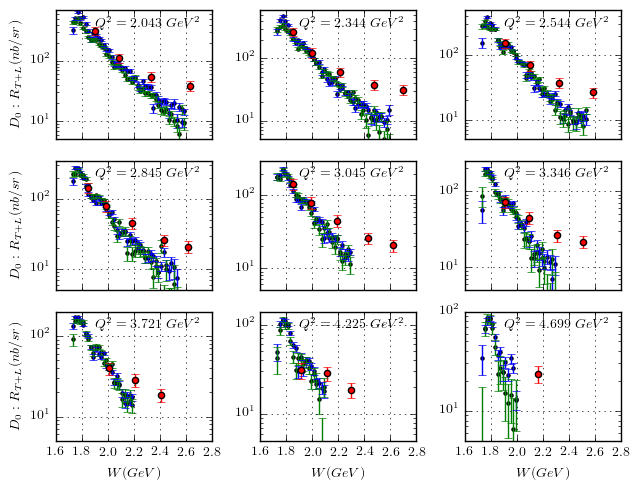

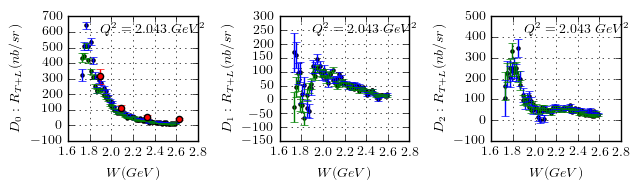

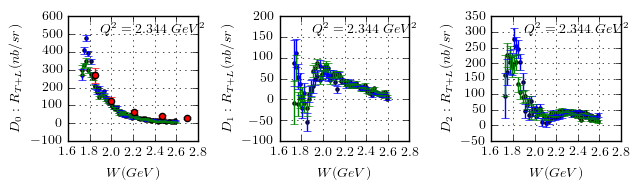

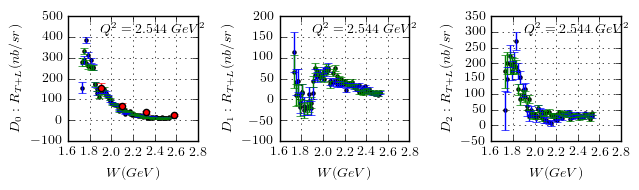

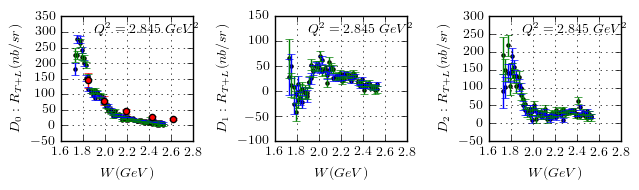

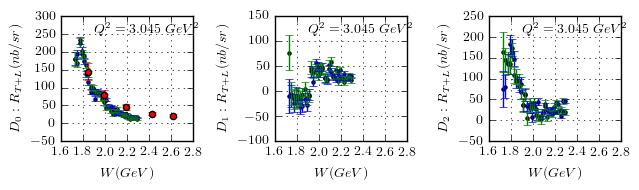

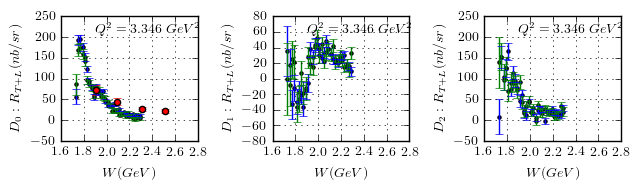

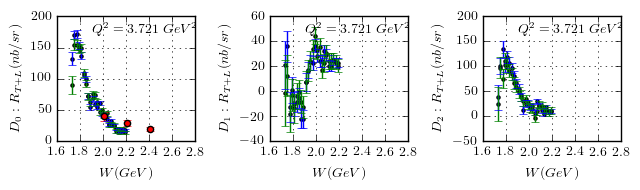

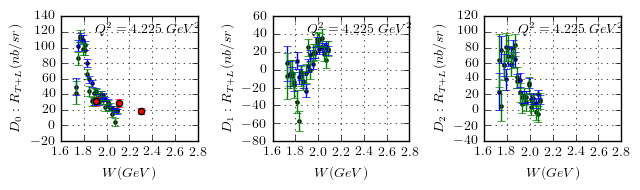

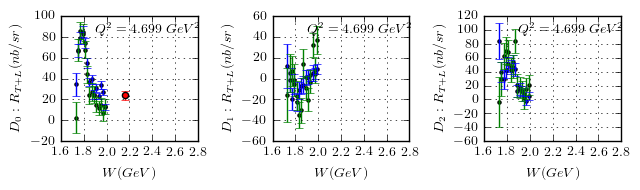

In [62]:
#%matplotlib inline
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
for iax,(ax,Q2) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()))):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='g', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', marker='o', zorder=20, ax=ax)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
    ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.set_xlabel(r'$W (GeV)$')
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_yscale('log')
    plt.tight_layout()


for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2), sharex=True)
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'$D_0: R_{T+L} (nb/sr)$', r'$D_1: R_{T+L} (nb/sr)$', r'$D_2: R_{T+L} (nb/sr)$']):
        if leg_i=='D0_tot':
            df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
            df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', zorder=20, ax=ax)
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='b', ax=ax)
        df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='g', ax=ax)
        ax.set_ylabel(lbl)
#         ytlocs, ytlbls = plt.yticks()
#         print([ylbl.get_text() for ylbl in ytlbls])
#         ylbls = ['%1.f'%(float(ylbl.get_text())/100) for ylbl in ytlbls]
#         plt.yticks(ytlocs, ylbls)
        ax.set_xlim(1.6,2.8)
        ax.set_xlabel(r'$W (GeV)$')
        ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.grid()
        plt.tight_layout()

In [93]:
df_1q2

,Q2,W,int_f,int_f_err,cost,x_tot,x_tot_err,x_tt,x_tt_err,x_tl,x_tl_err
100,2.043,1.93,1413.854573,61.468191,-0.9,206.909282,19.934380,51.820691,37.899502,-6.821614,30.780168
101,2.043,1.93,1413.854573,61.468191,-0.7,142.204168,22.348728,18.895745,40.582955,-61.121200,31.141527
102,2.043,1.93,1413.854573,61.468191,-0.5,106.929848,26.410902,48.679942,44.344929,-127.288276,42.527641
103,2.043,1.93,1413.854573,61.468191,-0.3,103.530540,30.375662,-17.081609,54.548085,2.374403,53.736383
104,2.043,1.93,1413.854573,61.468191,-0.1,129.762418,24.186397,-97.226539,46.804020,17.740156,41.786883
105,2.043,1.93,1413.854573,61.468191,0.1,137.304171,22.456151,-11.382514,47.046592,83.843768,37.738034
106,2.043,1.93,1413.854573,61.468191,0.3,212.891960,25.616581,22.659516,51.495513,119.607919,44.156748
107,2.043,1.93,1413.854573,61.468191,0.5,296.717617,27.468049,26.901782,56.441252,89.354779,47.645369
108,2.043,1.93,1413.854573,61.468191,0.7,371.142537,31.236876,177.404375,60.402006,21.498409,55.093907
109,2.043,1.93,1413.854573,61.468191,0.9,196.802760,32.769342,-55.138906,58.313140,-147.053315,51.793503


In [116]:
df_1q2.groupby(['Q2','W','int_f','int_f_err']).sum()/get_kfac(1.93)*0.2*2*PI

,,,,cost,x_tot,x_tot_err,x_tt,x_tt_err,x_tl,x_tl_err
Q2,W,int_f,int_f_err,,,,,,,
2.043,1.93,1413.854573,61.468191,-8.243345e-17,1413.854573,195.129837,122.906961,369.671681,-5.839698,324.024729


-726.246588108
531.523264074
540.577859605
1032.93843619
1199.59489044
364.423257052
295.696323294
137.426568742
165.532482417
264.653938181
335.035598969
-347.055932807
-619.141336083
-594.657597224
-629.143144256
-358.847542426
-205.680907912
-7.86497113211


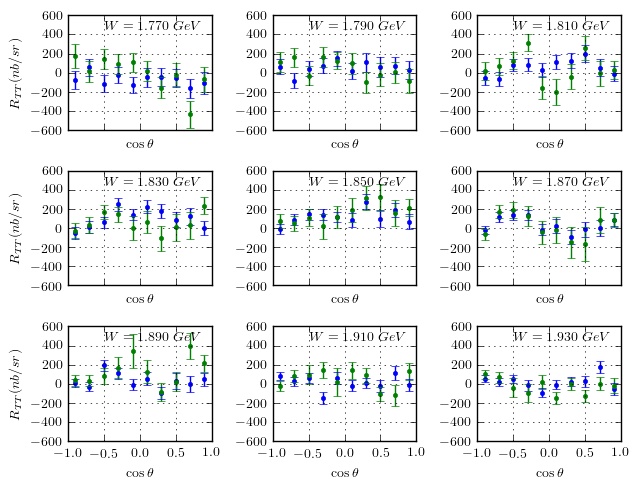

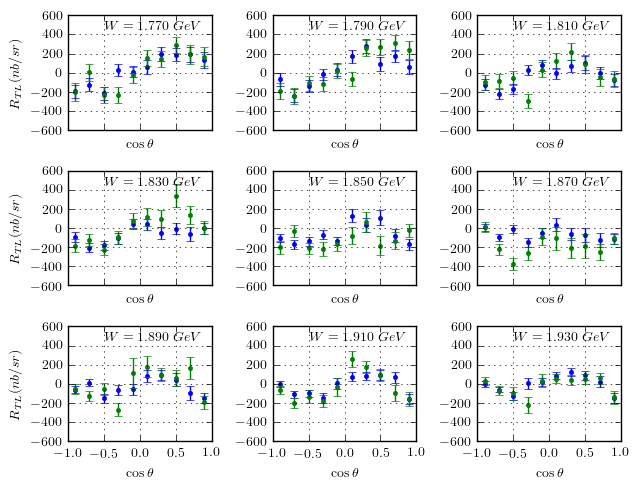

In [89]:
for leg_i,lbl in zip(['x_tt', 'x_tl'],[r'$R_{TT} (nb/sr)$', r'$R_{TL} (nb/sr)$']):
    fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
    for iax,(ax,W) in enumerate(zip(fig.get_axes(), [1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93])):
        Q2 = 2.043
#         leg_i = 'x_tt'
#         lbl = r'$R_{TT} (nb/sr)$'
        df_1q2 = df_e1f[(df_e1f.Q2==Q2)&(df_e1f.W==W)][['Q2', 'W', 'int_f', 'int_f_err', 'cost', 'x_tot', 'x_tot_err', 'x_tt', 'x_tt_err', 'x_tl', 'x_tl_err']]
        df_1q2_6 = df_e16[(df_e16.Q2==Q2)&(df_e1f.W==W)][['Q2', 'W', 'int_f', 'int_f_err', 'cost', 'x_tot', 'x_tot_err', 'x_tt', 'x_tt_err', 'x_tl', 'x_tl_err']]
    #     df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'Rtot', 'Rtot_e
    #     ax.plot(df_1q2.W, df_1q2[leg_i]*(df_1q2.apply(kfac, axis=1))*e1fscale, 'b.')
    #     ax.plot(df_1q2_6.W, df_1q2_6[leg_i]*(df_1q2_6.apply(kfac, axis=1)), 'g.')
        ax.errorbar(df_1q2.cost.values, df_1q2[leg_i].values, df_1q2['%s_err'%leg_i].values, fmt='b.')
        ax.errorbar(df_1q2_6.cost.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    #     ax.errorbar(df_1q2_m.W.values, df_1q2_m['Rtot'].values*4*PI, yerr=df_1q2_m['Rtot_err'].values*4*PI, fmt='r.')
        if iax%3==0:
            ax.set_ylabel(lbl)
        else:
            ax.set_ylabel('')
        ax.grid()
        ax.set_ylim(-600,600)
        ax.set_xlim(-1,1)
        ax.set_xlabel(r'$\cos{\theta}$')
        ax.text(0.25, 0.9, r'$W = %.3f\ GeV$'%W,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
    #     ax.set_yscale('log')
        plt.tight_layout()
        print(df_1q2[leg_i].sum())

2.043
2.344
2.544
2.845
3.045
3.346
3.721
4.225
4.699


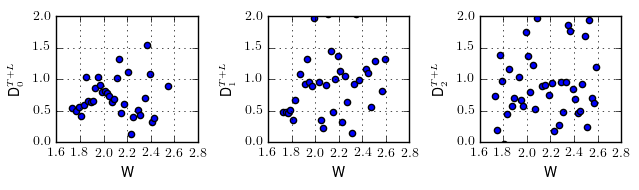

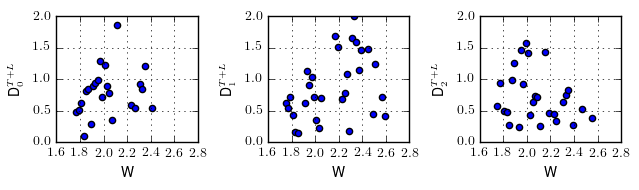

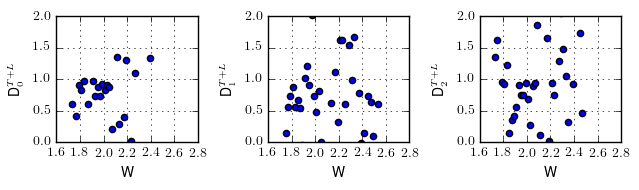

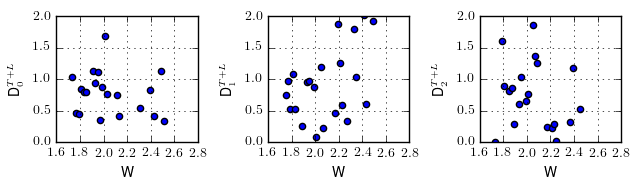

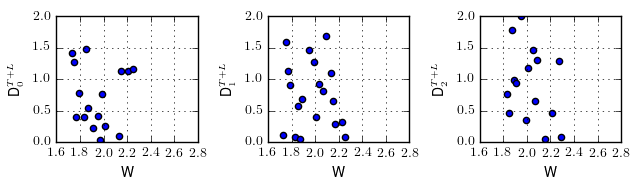

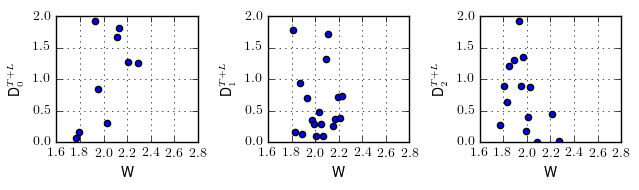

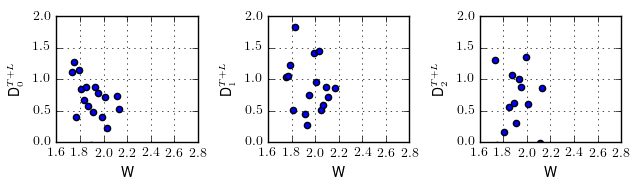

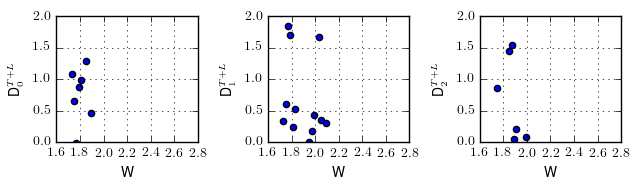

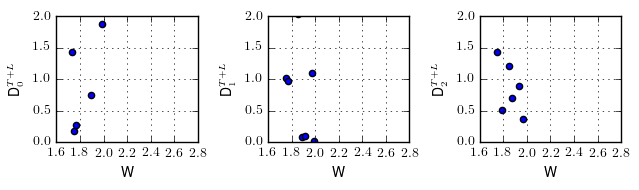

In [27]:
#%matplotlib inline

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2].set_index('W', drop=False)
    df_1q2_f = df_f[df_f.Q2==Q2].set_index('W', drop=False)
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2_f['rat'] = df_1q2_f[leg_i]/df_1q2[leg_i]
#         df_1q2_f['rat_err'] = df_1q2_f['%s_err'%leg_i]/df_1q2[leg_i]
#         df_1q2_f.plot('W', 'rat', yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', 'rat', kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
        ax.set_ylim(0,2)
#         ax.set_title(lbl)
    print(Q2)
    plt.tight_layout()

2.043
2.344
2.544
2.845
3.045
3.346
3.721
4.225
4.699


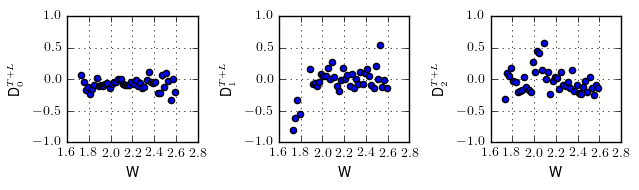

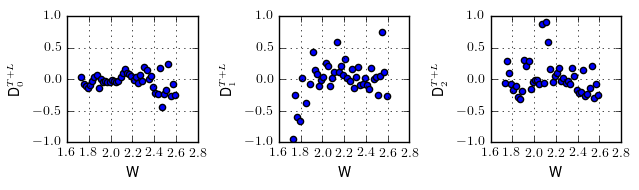

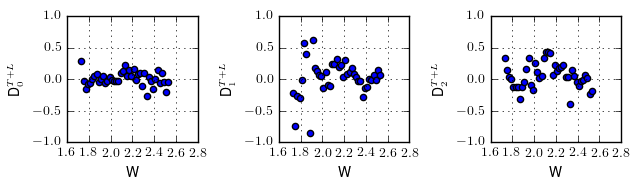

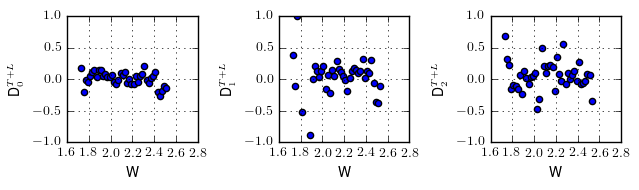

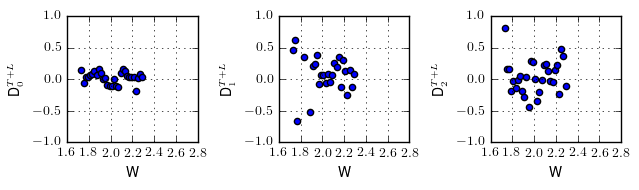

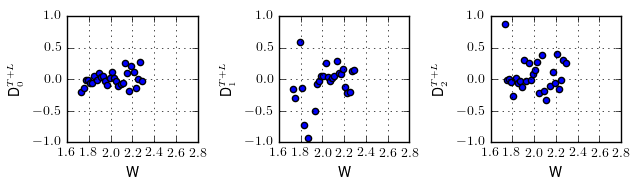

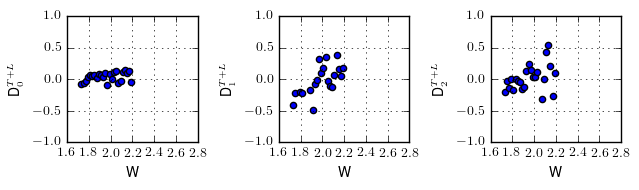

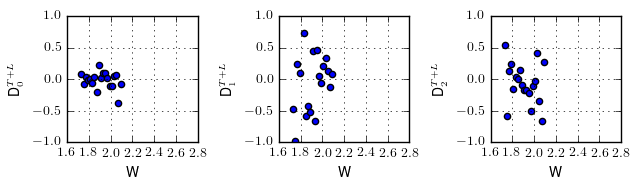

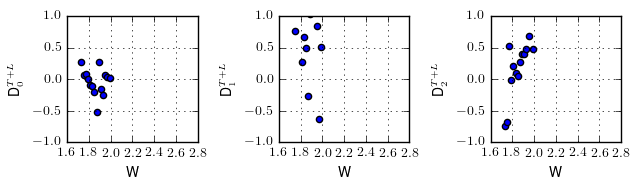

In [172]:
#%matplotlib inline

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2].set_index('W', drop=False)
    df_1q2_f = df_f[df_f.Q2==Q2].set_index('W', drop=False)
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2_f['rat'] = (df_1q2_f[leg_i]-df_1q2[leg_i])/(df_1q2_f[leg_i]+df_1q2[leg_i])
#         df_1q2_f['rat_err'] = df_1q2_f['%s_err'%leg_i]/df_1q2[leg_i]
#         df_1q2_f.plot('W', 'rat', yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', 'rat', kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
        ax.set_ylim(-1,1)
#         ax.set_title(lbl)
    print(Q2)
    plt.tight_layout()

In [218]:
# print(parms_exp_q2strs)
# df_e16.Q2.unique()
def wsum(s):
    return (s*0.2).sum()/2*4*math.pi
df_e16[(df_e16.W<1.9)&(df_e16.W>1.8)&(df_e16.Q2==2.043)].groupby(['W','int_d', 'int_f'])['x_tot'].agg(['sum',wsum]).reset_index()
# df_e16

,W,int_d,int_f,sum,wsum
0,1.81,3033.955060,3472.664343,6546.317251,8226.344873
1,1.83,2406.677445,3063.796001,5303.676194,6664.796067
2,1.85,2082.774615,2191.841112,3542.857497,4452.086034
3,1.87,1628.852289,1728.746086,2640.021331,3317.548648
4,1.89,1885.001788,2323.504998,3381.665293,4249.525936


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


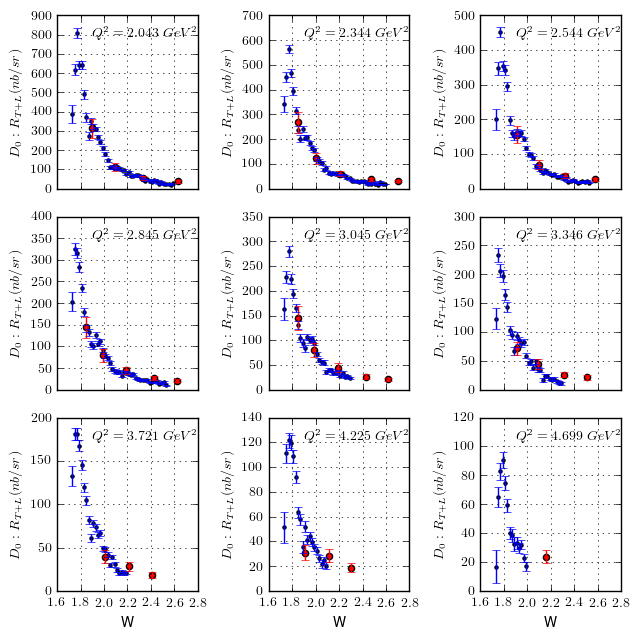

In [174]:
#%matplotlib inline
scale4tot = 1 #4*math.pi
fig, axes = plt.subplots(3,3, figsize=(6.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]*scale4tot
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]*scale4tot
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_xlim(1.6,2.8)
    ax.set_ylim(0)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


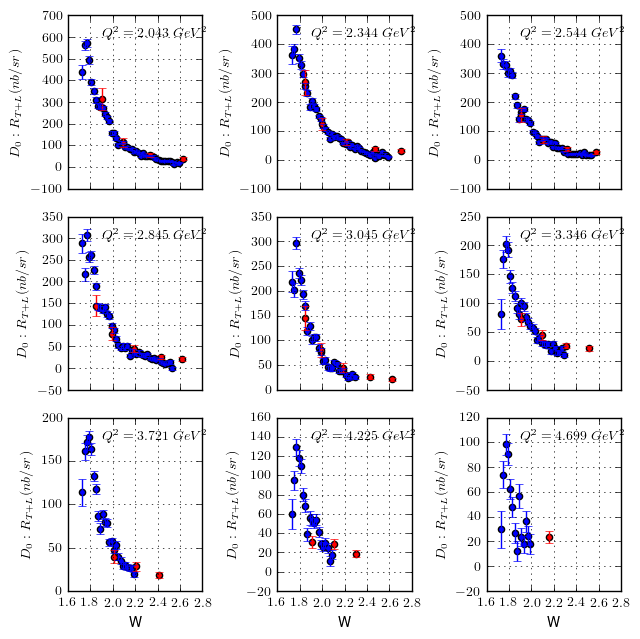

In [175]:
#%matplotlib inline

fig, axes = plt.subplots(3,3, figsize=(6.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_f.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

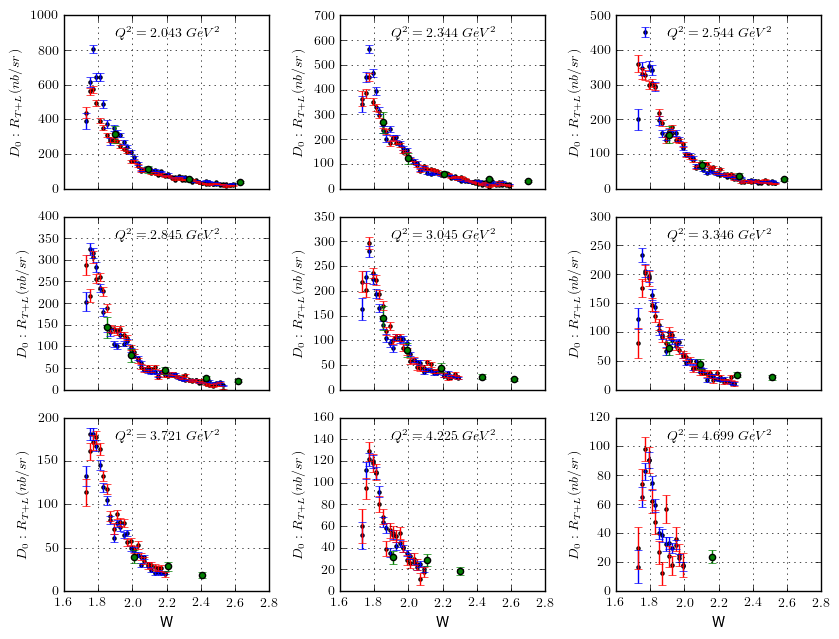

In [176]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
#     lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

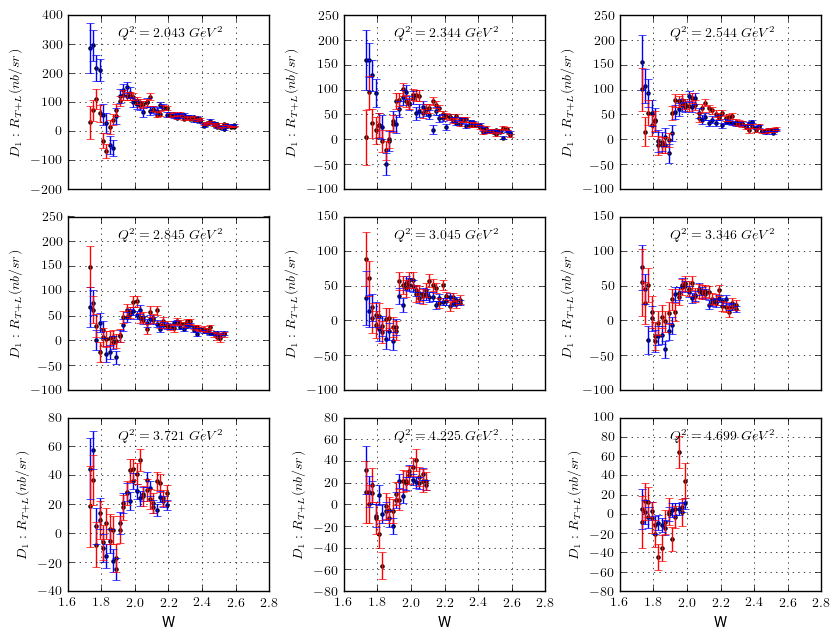

In [177]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D1_tot'
    lbl = r'$D_1: R_{T+L} (nb/sr)$'
#     lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
#     df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
#     ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

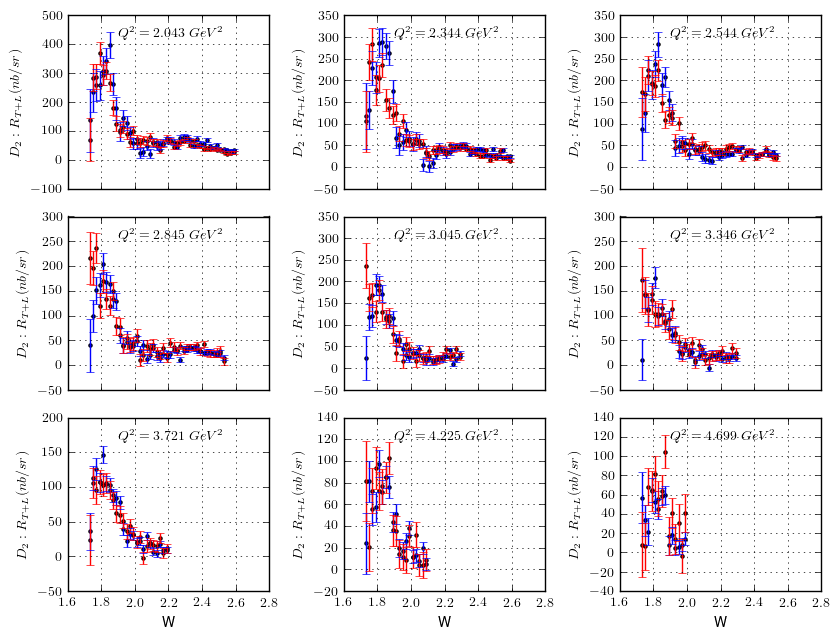

In [178]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D2_tot'
    lbl = r'$D_2: R_{T+L} (nb/sr)$'
#     lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
#     df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
#     ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

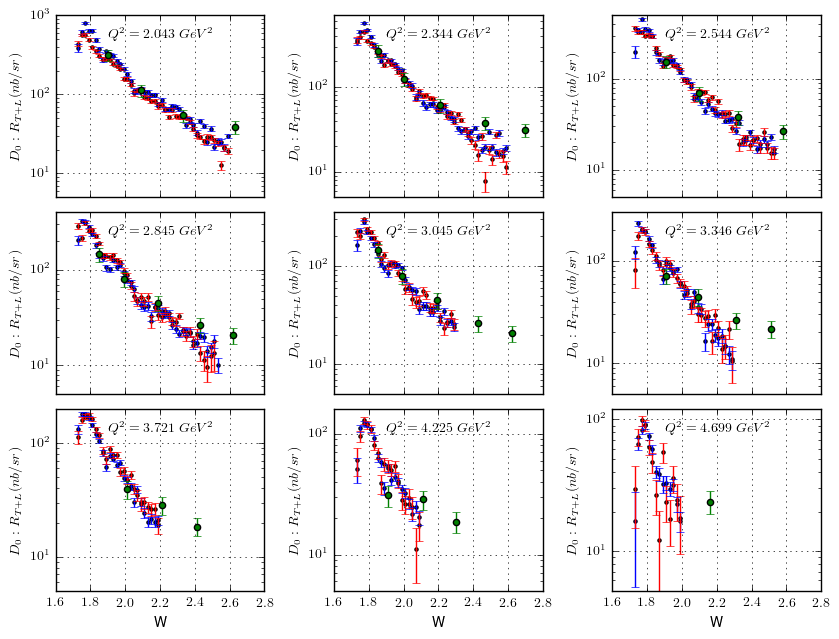

In [180]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_yscale('log')
    plt.tight_layout()

(-300, 300)

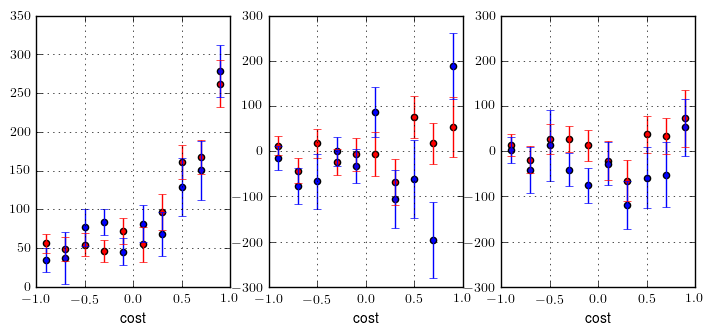

In [161]:
fig, axes = plt.subplots(1,3, figsize=(8.5,3.5))
df_e1f_1q2w = df_e1f[(df_e1f.Q2==2.043)&(df_e1f.W==2.07)][['W','Q2', 'cost', 'x_tot', 'x_tot_err', 'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']]
df_e16_1q2w = df_e16[(df_e16.Q2==2.043)&(df_e16.W==2.07)][['W','Q2', 'cost', 'x_tot', 'x_tot_err', 'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']]
df_e1f_1q2w.plot('cost', 'x_tot', yerr='x_tot_err', kind='scatter', color='r', ax=axes[0])
df_e1f_1q2w.plot('cost', 'x_tl', yerr='x_tl_err', kind='scatter', color='r', ax=axes[1])
df_e1f_1q2w.plot('cost', 'x_tt', yerr='x_tt_err', kind='scatter', color='r', ax=axes[2])
df_e16_1q2w.plot('cost', 'x_tot', yerr='x_tot_err', kind='scatter', ax=axes[0])
df_e16_1q2w.plot('cost', 'x_tl', yerr='x_tl_err', kind='scatter', ax=axes[1])
df_e16_1q2w.plot('cost', 'x_tt', yerr='x_tt_err', kind='scatter', ax=axes[2])
axes[0].set_ylim(0)
for ax in axes:
    ax.set_xlim(-1,1)
    ax.grid()
    ax.set_ylabel('')
axes[1].set_ylim(-300, 300)
axes[2].set_ylim(-300, 300)

In [162]:
df_e16_1q2w.x_tot.mean()*4*PI

1239.1608617679585

In [163]:
Q2=2.043
df_f6 = df_f.merge(df_6, how='inner', left_on=['W', 'Q2'], right_on=['W', 'Q2'], suffixes=['_f', '_6'])

In [164]:
df_f6 = df_f6[['W', 'Q2', 'eps_f', 'eps_l_f', 'D0_tot_f', 'D0_tot_err_f', 'eps_6', 'eps_l_6', 'D0_tot_6', 'D0_tot_err_6']]

In [165]:
df_f6['R_L'] = (df_f6.D0_tot_f-df_f6.D0_tot_6)/(df_f6.eps_l_f-df_f6.eps_l_6)
df_f6['R_L_err'] = np.sqrt(np.power(df_f6.D0_tot_err_f,2)+np.power(df_f6.D0_tot_err_6,2))/(df_f6.eps_l_f-df_f6.eps_l_6)

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


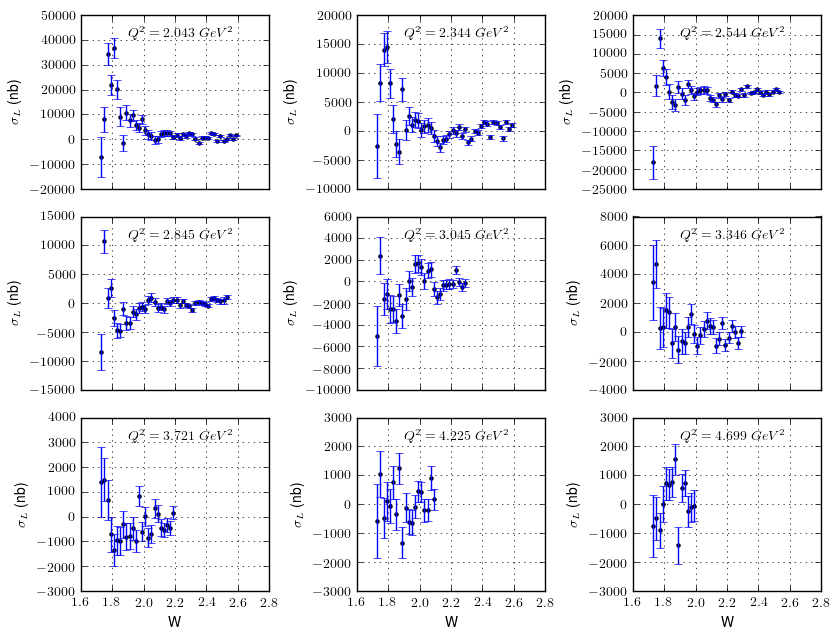

In [166]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_f6.Q2.unique())):
    leg_i = 'R_L'
    lbl = r'$\sigma_L$ (nb)'
    df6_1q2 = df_f6[df_f6.Q2==Q2]
    df6_1q2[leg_i] = df6_1q2[leg_i]
    df6_1q2['%s_err'%leg_i] = df6_1q2['%s_err'%leg_i]
    df6_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
#     ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [215]:
dfeps = df_f6[['Q2', 'W', 'eps_f','eps_6', 'eps_l_f', 'eps_l_6']]
dfeps['eps_diff'] = (dfeps.eps_6-dfeps.eps_f)/(dfeps.eps_6+dfeps.eps_f)
dfeps['eps_l_diff'] = (dfeps.eps_l_6-dfeps.eps_l_f)/(dfeps.eps_l_6+dfeps.eps_l_f)
dfeps

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Q2,W,eps_f,eps_6,eps_l_f,eps_l_6,eps_diff,eps_l_diff
0,2.043,1.73,0.834682,0.851139,0.347737,0.354593,0.009762,0.009762
1,2.043,1.75,0.829758,0.846731,0.334391,0.341231,0.010124,0.010124
2,2.043,1.77,0.824664,0.842171,0.321534,0.328359,0.010503,0.010503
3,2.043,1.79,0.819395,0.837453,0.309146,0.315959,0.010899,0.010899
4,2.043,1.81,0.813945,0.832575,0.297208,0.304011,0.011315,0.011315
5,2.043,1.83,0.808310,0.827530,0.285702,0.292495,0.011749,0.011749
6,2.043,1.85,0.802484,0.822315,0.274610,0.281396,0.012205,0.012205
7,2.043,1.87,0.796462,0.816924,0.263915,0.270695,0.012683,0.012683
8,2.043,1.89,0.790239,0.811353,0.253601,0.260377,0.013183,0.013183
9,2.043,1.91,0.783809,0.805596,0.243653,0.250425,0.013708,0.013708
